In [153]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [154]:
pip install seaborn

In [155]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Importing the libraries


In [1]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set
warnings.filterwarnings('ignore')

C:\Users\Naveen\AppData\Local\Temp\ipykernel_12452\3807762749.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


reading the dataset

In [2]:
df = pd.read_csv(r'C:\Users\Naveen\OneDrive\Desktop\wholesale_customer_segmentation_ML\consumer_data.csv')
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


 Data pre-processing


In [160]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [161]:
#columns count
df.shape[1]


8

In [162]:
#row count
df.shape[0]

440

In [163]:
df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [165]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# #handiling outliers


In [166]:
import sys
sys.path

from scipy import stats
import numpy as np


In [167]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df))
threshold = 2  # You can adjust this threshold
outliers = np.where(z_scores > threshold)


In [168]:
#df.Fresh.describe([.75,.90,.95,.99])
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df < lower_bound) | (df > upper_bound)]


In [169]:
df.duplicated().sum()

0

In [170]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

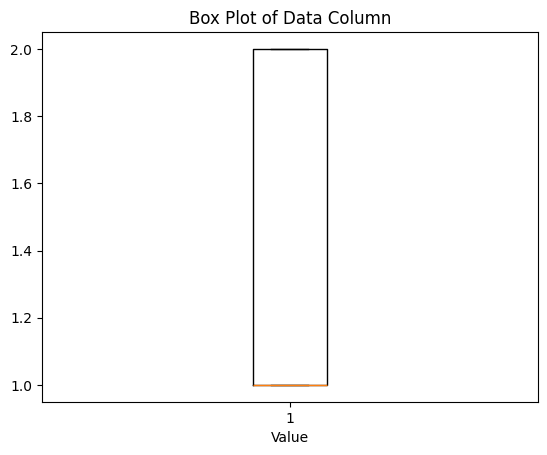

In [171]:
plt.boxplot(df['Channel'], vert=True)  # Set vert=False for a horizontal box plot
plt.title('Box Plot of Data Column')
plt.xlabel('Value')
plt.show()

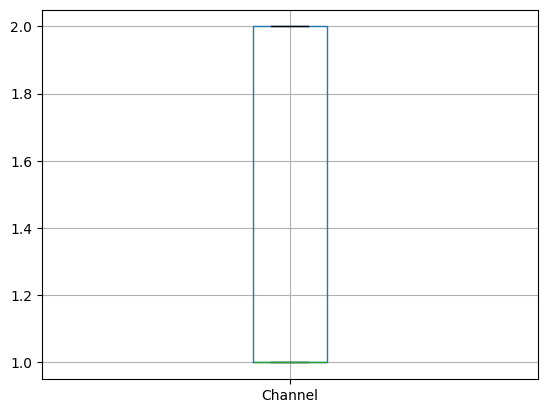

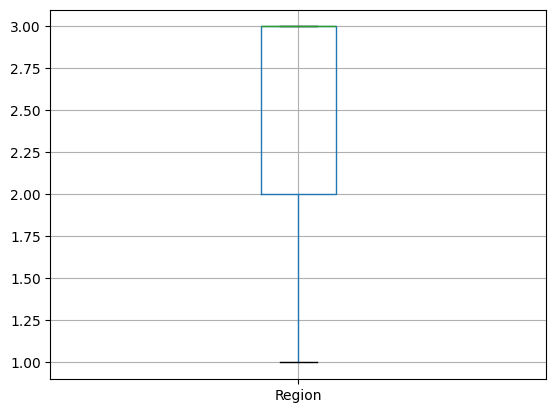

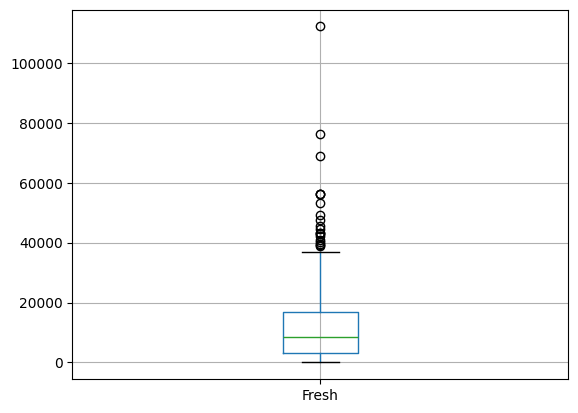

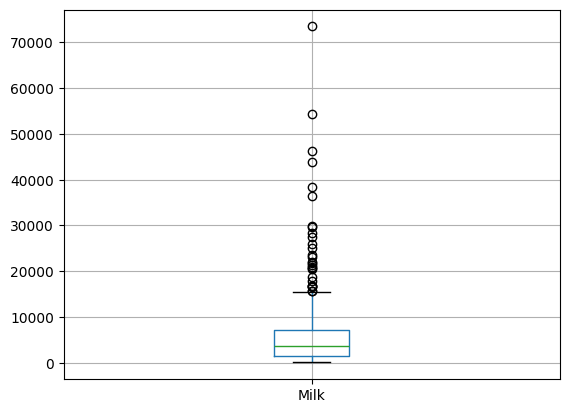

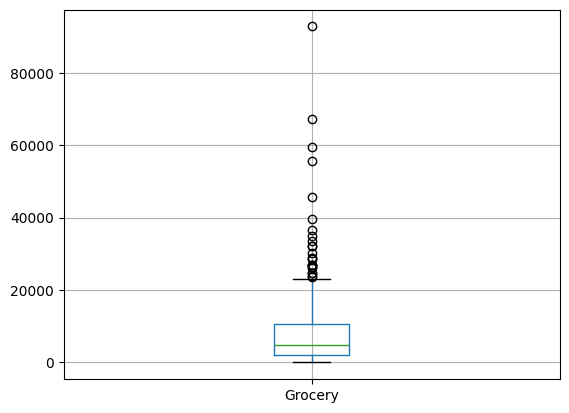

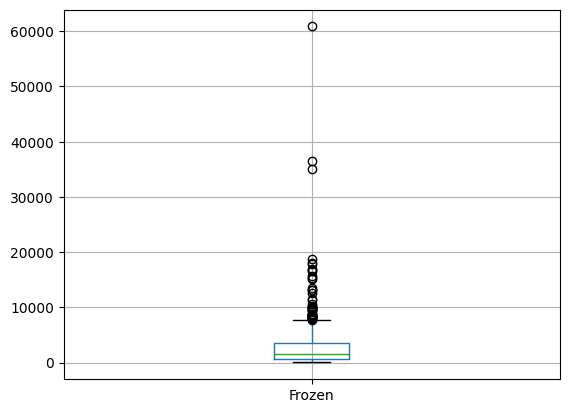

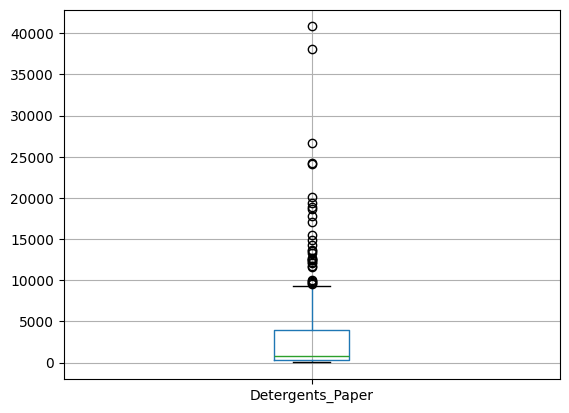

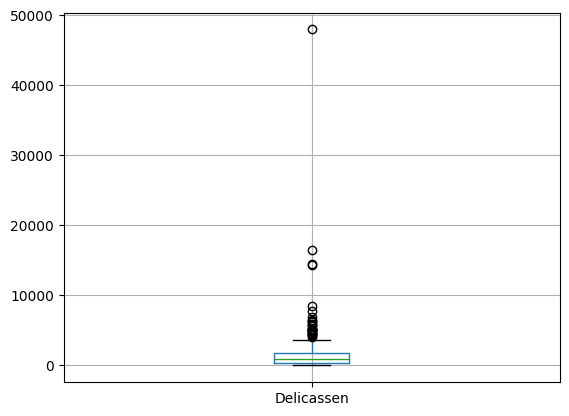

In [172]:
import matplotlib.pyplot as plt

for i in df.columns:
    df[[i]].boxplot()
    plt.show()

In [ ]:
pip install scikit-learn


In [ ]:
#before this install scikit-learn
data=df.copy()
from sklearn.preprocessing import MinMaxScaler

# Assuming you have defined 'data' and 'norm' earlier
scaler = MinMaxScaler()
columns = data.columns[2:]
norm = scaler.fit_transform(data.iloc[:, 2:])  # Only numeric variables


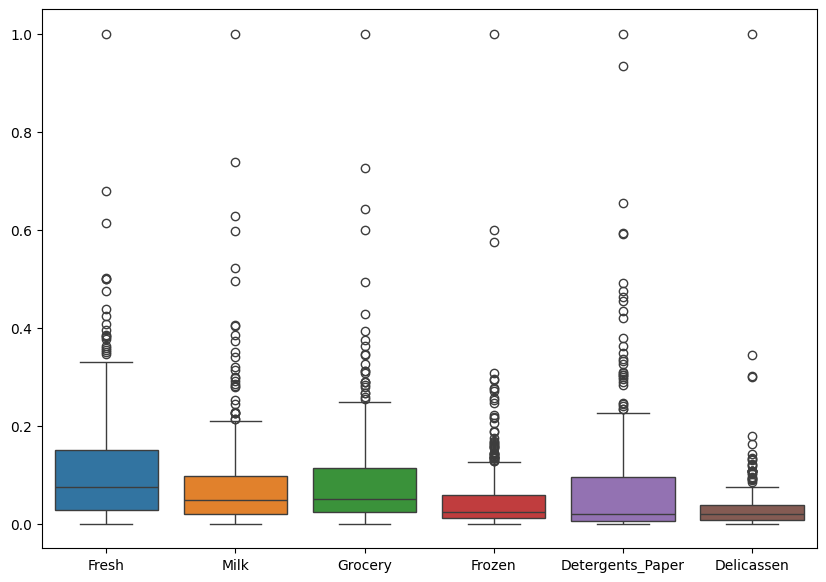

In [ ]:
norm=data.iloc[:,2:] #Numerical data

scaler=MinMaxScaler()
columns=data.columns[2:]
norm=scaler.fit_transform(data.iloc[:,2:]) #Only numeric variables
norm=pd.DataFrame(norm, columns=columns)

plt.figure(figsize=(10,7))
sns.boxplot(data=norm)
plt.show()

In [ ]:
for i in norm.columns:
    iqr=np.percentile(norm[i], 75)-np.percentile(norm[i], 25)
    per75=np.percentile(norm[i], 75)
    per25=np.percentile(norm[i], 25)
    norm[i]=np.where(norm[i]>per75+1.5*iqr, per75+1.5*iqr,norm[i] )
    norm[i]=np.where(norm[i]<per25-1.5*iqr, per25-1.5*iqr,norm[i] )

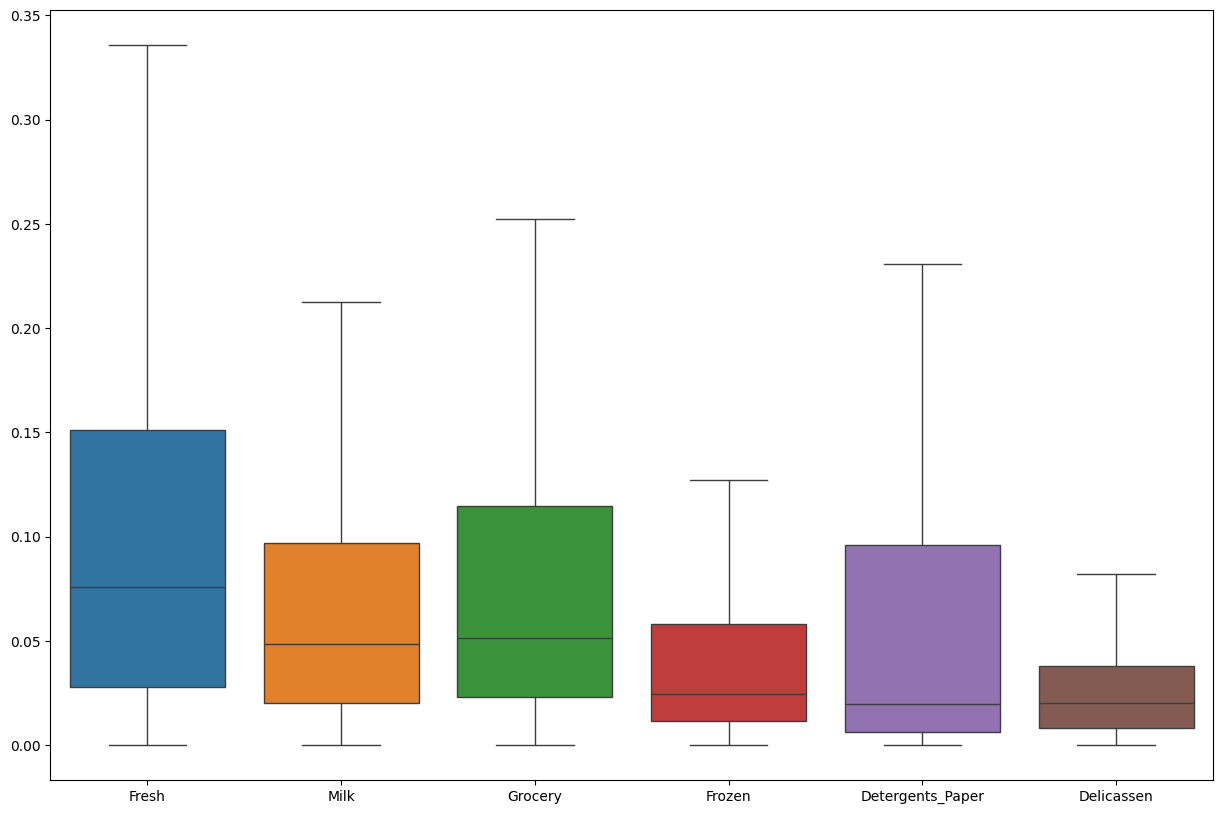

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=norm)
plt.show()

In [ ]:
norm.head
df=norm
df.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.082087
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.082087


In [ ]:
df.head

<bound method NDFrame.head of         Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.112940  0.130727  0.081464  0.003106          0.065427    0.027847
1    0.062899  0.132824  0.103097  0.028548          0.080590    0.036984
2    0.056622  0.119181  0.082790  0.039116          0.086052    0.082087
3    0.118254  0.015536  0.045464  0.104842          0.012346    0.037234
4    0.201626  0.072914  0.077552  0.063934          0.043455    0.082087
..        ...       ...       ...       ...               ...         ...
435  0.264829  0.163338  0.172715  0.127330          0.004385    0.045912
436  0.335626  0.018736  0.008202  0.073713          0.002205    0.048874
437  0.129543  0.210136  0.252292  0.006771          0.230670    0.038882
438  0.091727  0.026224  0.024025  0.016649          0.004042    0.044264
439  0.024824  0.022371  0.027022  0.000657          0.011611    0.001022

[440 rows x 6 columns]>

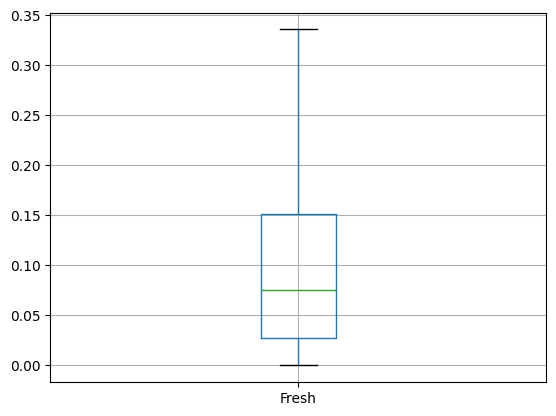

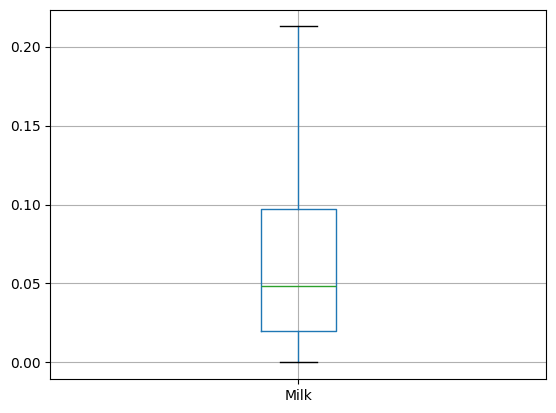

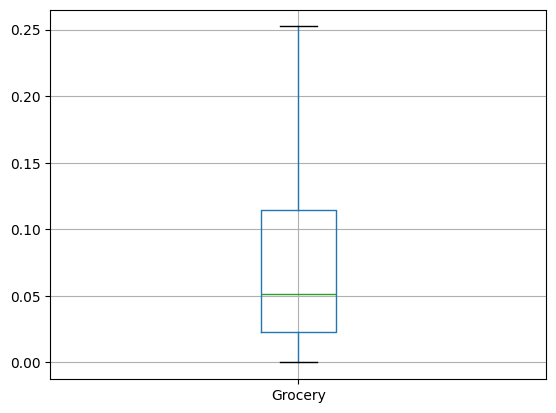

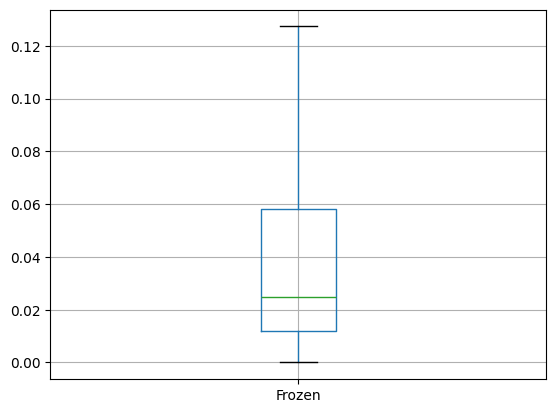

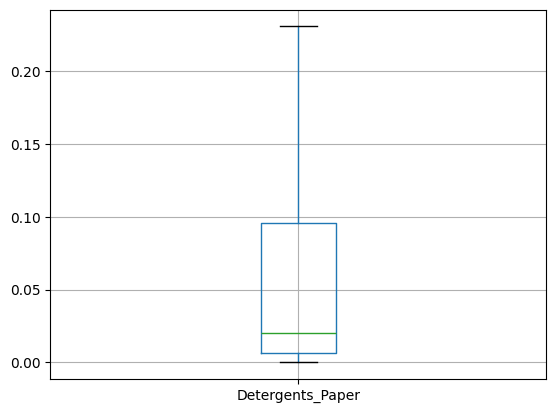

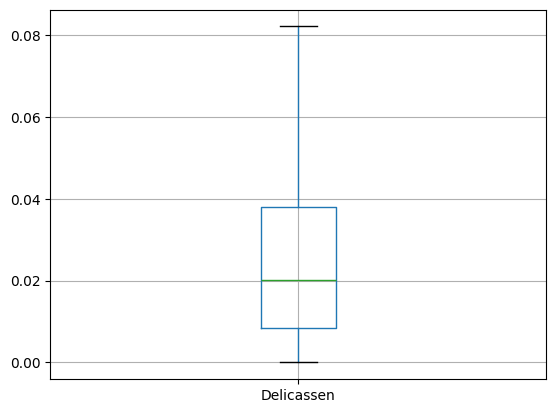

In [ ]:
import matplotlib.pyplot as plt

for col in df.select_dtypes(["float", "int"]).columns:
    df[[col]].boxplot()
    plt.show()

#Analysis

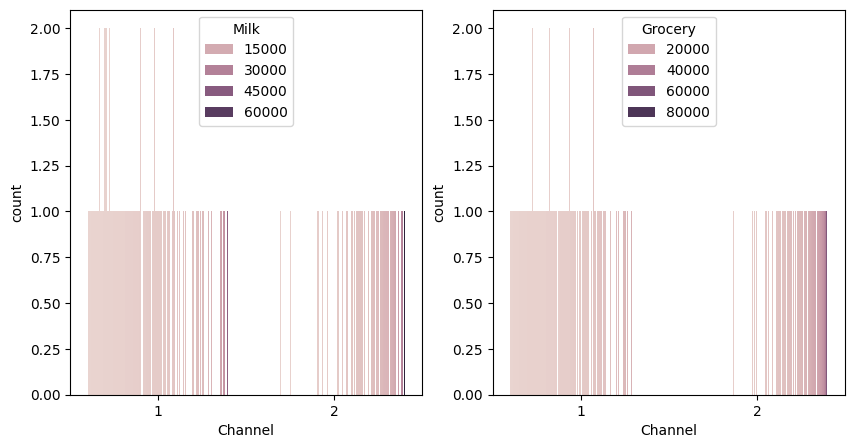

In [20]:
#Bivariate analysis:
plt.figure(figsize=(10,5)) # Adjust the figure size as needed
# Subplot 1
plt.subplot(121)
sns.countplot(data=df, x='Channel', hue='Milk')
# Subplot 2
plt.subplot(122)
sns.countplot(data=df, x='Channel', hue='Grocery')

# Show the plot
plt.show()


<Figure size 1000x50 with 0 Axes>

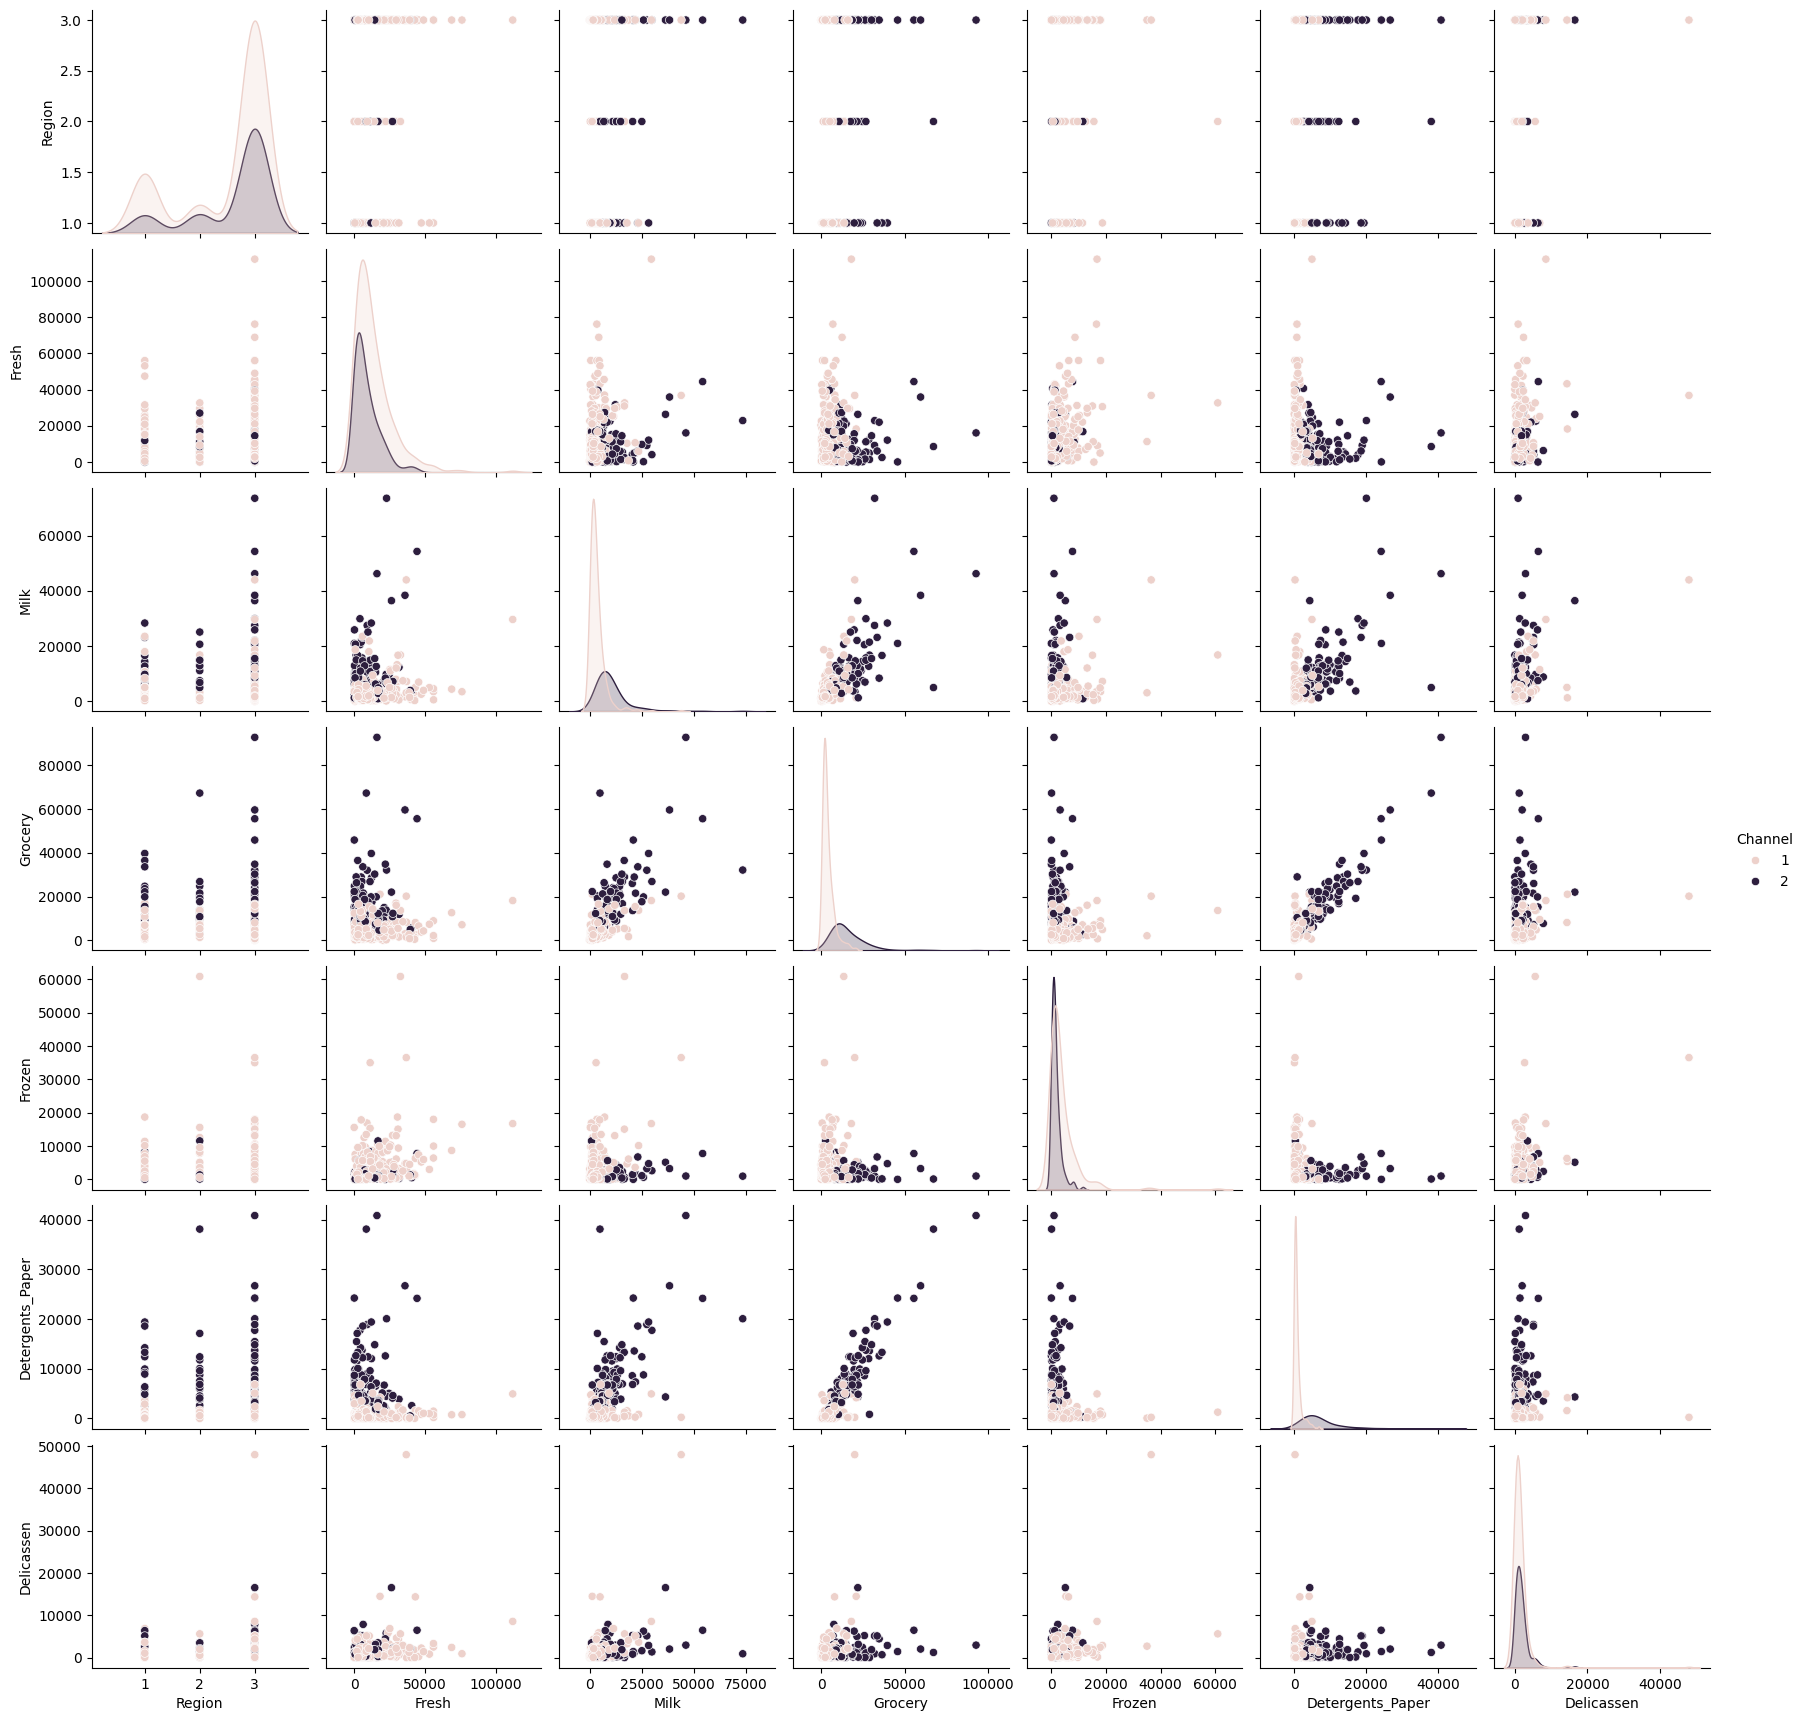

In [24]:
#multivariate analysis
plt.figure(figsize=(10,0.5))
sns.pairplot(df, hue='Channel')


 using k-means clustering 

In [ ]:
from sklearn.cluster import KMeans

# Build the model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to your original dataframe
df['Cluster'] = cluster_labels

print(df.head())

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.112940  0.130727  0.081464  0.003106          0.065427    0.027847   
1  0.062899  0.132824  0.103097  0.028548          0.080590    0.036984   
2  0.056622  0.119181  0.082790  0.039116          0.086052    0.082087   
3  0.118254  0.015536  0.045464  0.104842          0.012346    0.037234   
4  0.201626  0.072914  0.077552  0.063934          0.043455    0.082087   

   Cluster  
0        1  
1        1  
2        1  
3        3  
4        0  


In [5]:
#df = df.iloc[ : , 2 : ]
df.head(20)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


Train.Test and cross validation of Dataset

In [ ]:
# columns to keep:
data= df[[ 'Fresh','Milk','Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen','Cluster']].rename({'Cluster':'label'},axis=1)



In [ ]:
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,1
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,1


In [ ]:
X = data.iloc[:, data.columns != 'label']
y = data.iloc[:, data.columns == 'label']

Descriptive Statistics:
            Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     0.101246    0.067993    0.077965    0.040794          0.058535   
std      0.091054    0.059725    0.071101    0.039582          0.072036   
min      0.000000    0.000000    0.000000    0.000000          0.000000   
25%      0.027863    0.020124    0.023174    0.011788          0.006216   
50%      0.075802    0.048636    0.051225    0.024670          0.019927   
75%      0.150968    0.097154    0.114821    0.058005          0.095997   
max      0.335626    0.212697    0.252292    0.127330          0.230670   

       Delicassen     Cluster  
count  440.000000  440.000000  
mean     0.026360    1.763636  
std      0.022592    1.236700  
min      0.000000    0.000000  
25%      0.008453    1.000000  
50%      0.020077    2.000000  
75%      0.037907    3.000000  
max      0.082087    3.000000  
Number of du

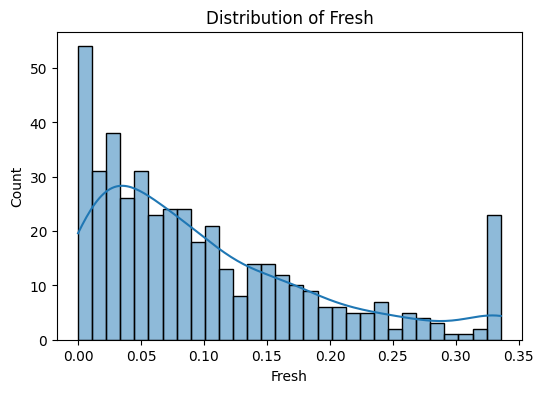

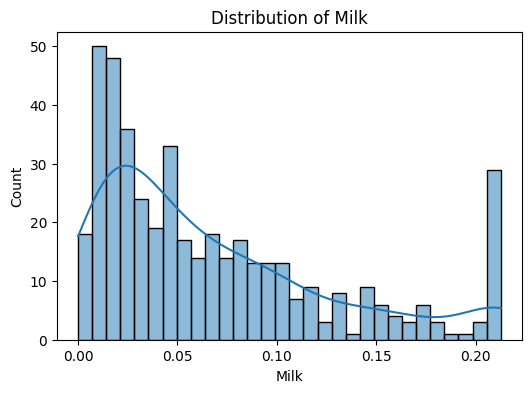

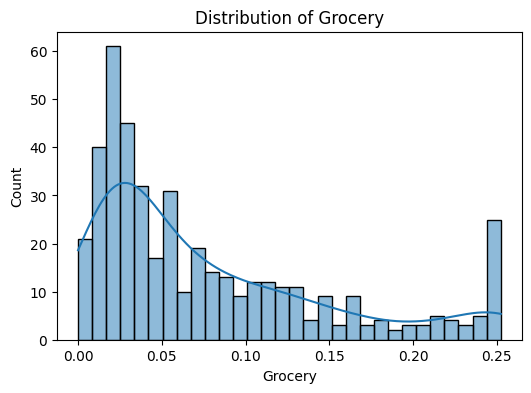

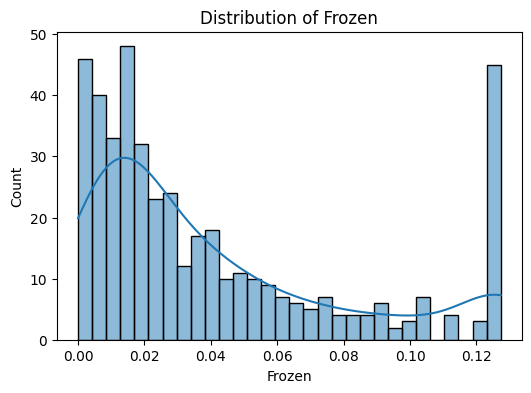

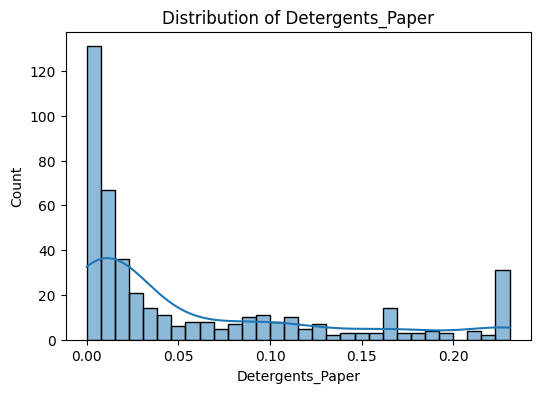

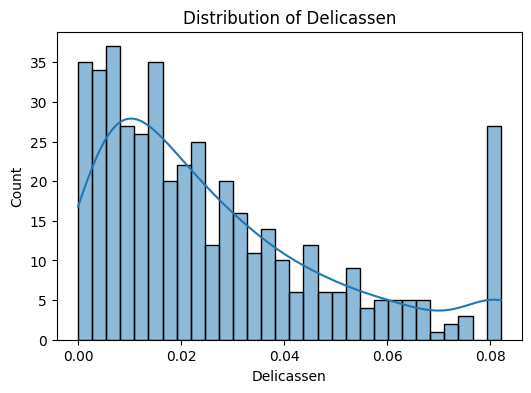

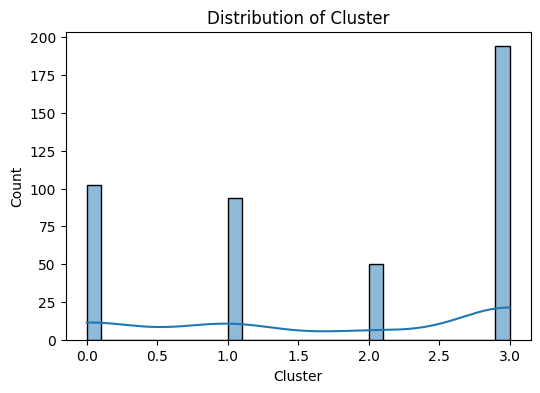

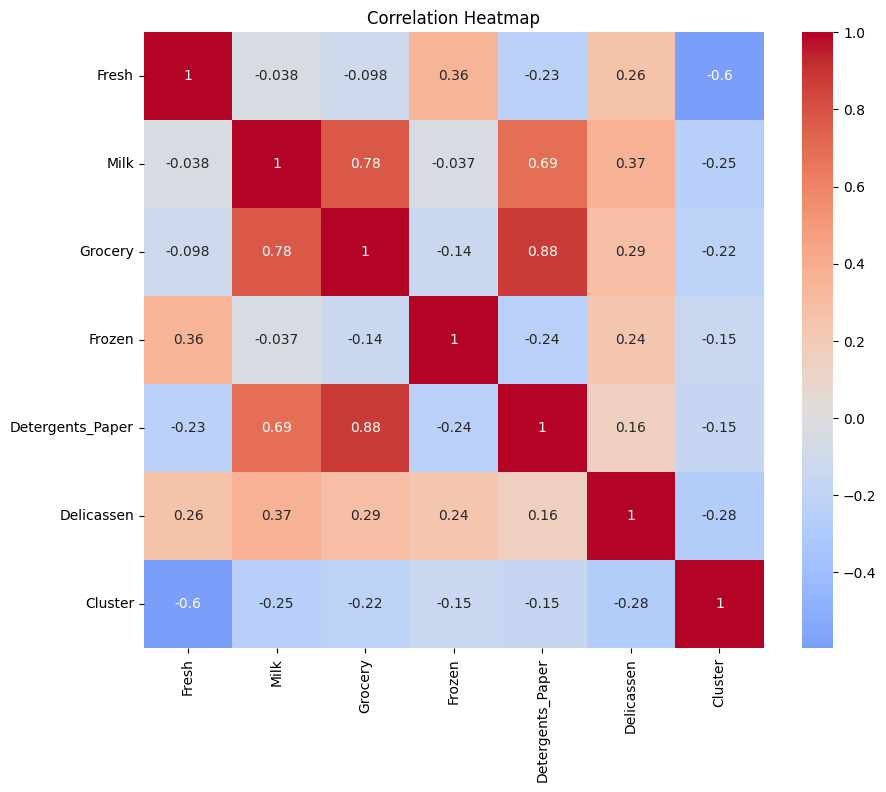

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Check for duplicates
print("Number of duplicate rows: ", df.duplicated().sum())

# Distribution plots for each feature
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Heatmap for correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Check the size of each cluster
print("Cluster Sizes:\n", df['Cluster'].value_counts())

# Check the characteristics of each cluster
for i in range(4):
    print("\nCluster ", i)
    print(df[df['Cluster'] == i].describe())

Cluster Sizes:
 Cluster
3    194
0    102
1     94
2     50
Name: count, dtype: int64

Cluster  0
            Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  102.000000  102.000000  102.000000  102.000000        102.000000   
mean     0.234619    0.058126    0.057076    0.063746          0.023625   
std      0.066279    0.049480    0.044910    0.045644          0.027978   
min      0.146637    0.001076    0.000000    0.001528          0.000000   
25%      0.172520    0.022078    0.022872    0.022118          0.005812   
50%      0.222871    0.048248    0.045367    0.049643          0.012652   
75%      0.283416    0.071195    0.078417    0.125669          0.026951   
max      0.335626    0.212697    0.217371    0.127330          0.123824   

       Delicassen  Cluster  
count  102.000000    102.0  
mean     0.034905      0.0  
std      0.024463      0.0  
min      0.000000      0.0  
25%      0.016135      0.0  
50%      0.028609      0.0  
75%      0.053103      

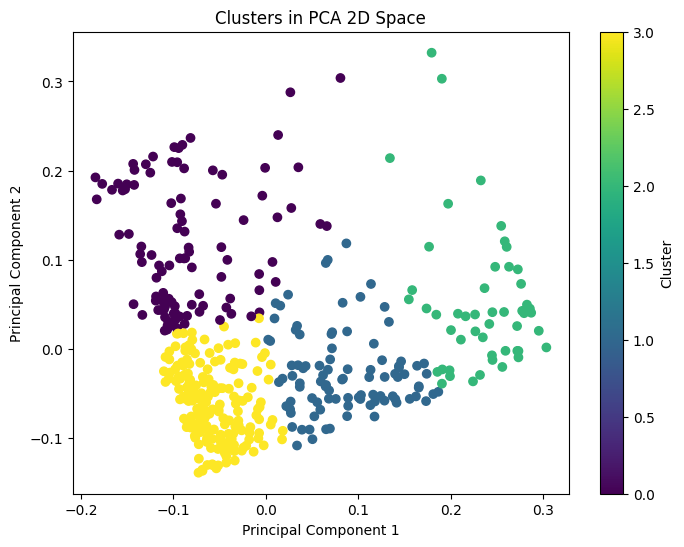

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.drop('Cluster', axis=1))

# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the clusters labels to the DataFrame
PCA_components['Cluster'] = df['Cluster']

# Plot the clustered dataset
plt.figure(figsize=(8,6))
plt.scatter(PCA_components['Principal Component 1'], PCA_components['Principal Component 2'], c=PCA_components['Cluster'])
plt.title('Clusters in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
df.head(400)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,1
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,1
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.082087,1
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,3
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.082087,0
...,...,...,...,...,...,...,...
395,0.085592,0.017170,0.013581,0.047597,0.020527,0.005987,3
396,0.040233,0.162521,0.100693,0.043045,0.082672,0.046099,1
397,0.102828,0.021935,0.015359,0.111975,0.001494,0.015436,3
398,0.101999,0.013303,0.006241,0.088176,0.001739,0.005090,3


In [ ]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function

# Assuming you have defined your X and y earlier

# Split the data into test and train, maintaining the same distribution of the output variable 'y' [stratify=y]
X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# Split the train data into train and cross-validation, maintaining the same distribution of the output variable 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)


In [ ]:

print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 281
Number of data points in test data: 88
Number of data points in cross validation data: 71


In [ ]:
test_df.head(2)

,Grocery,Frozen,Detergents_Paper,Delicassen
219,0.014950,0.037489,0.002033,0.002649
223,0.056717,0.091825,0.019229,0.028306


In [ ]:
y_test.head(2)

,label
219,3
223,3


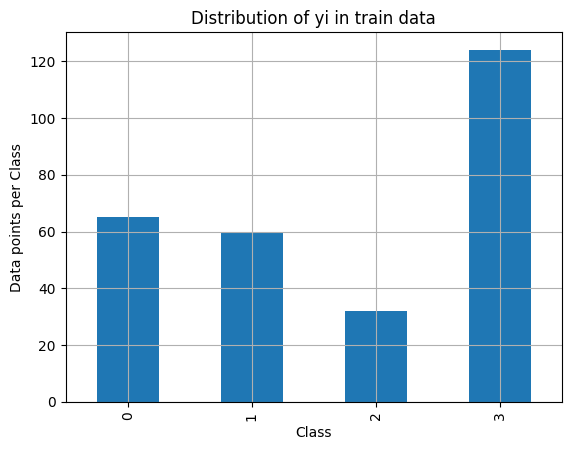

Number of data points in class 4 : 124 ( 44.128 %)
Number of data points in class 1 : 65 ( 23.132 %)
Number of data points in class 2 : 60 ( 21.352 %)
Number of data points in class 3 : 32 ( 11.388 %)
--------------------------------------------------------------------------------


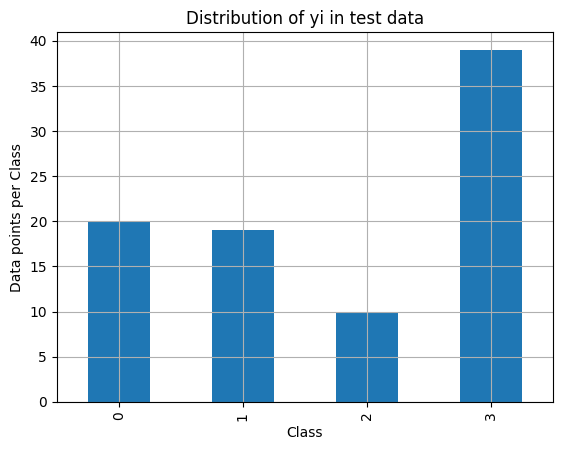

Number of data points in class 4 : 39 ( 44.318 %)
Number of data points in class 1 : 20 ( 22.727 %)
Number of data points in class 2 : 19 ( 21.591 %)
Number of data points in class 3 : 10 ( 11.364 %)
--------------------------------------------------------------------------------


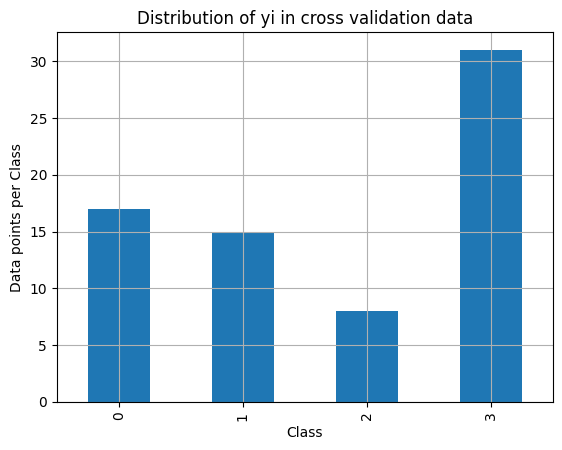

Number of data points in class 4 : 31 ( 43.662 %)
Number of data points in class 1 : 17 ( 23.944 %)
Number of data points in class 2 : 15 ( 21.127 %)
Number of data points in class 3 : 8 ( 11.268 %)


In [ ]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train['label'].value_counts().sort_index()
test_class_distribution = y_test['label'].value_counts().sort_index()
cv_class_distribution = y_cv ['label'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


In [ ]:

# print('Number of data points in train data:', train_df.shape[0])
# print('Number of data points in test data:', test_df.shape[0])
# print('Number of data points in cross validation data:', cv_df.shape[0])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df= scaler.fit_transform(train_df)
train_df = pd.DataFrame(train_df)
test_df = scaler.transform(test_df)
test_df = pd.DataFrame(test_df)
cv_df = scaler.transform(cv_df)
cv_df = pd.DataFrame(cv_df)




In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt


In [ ]:



alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df,y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df,y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5


Log Loss : 0.6447347016280329
for n_estimators = 100 and max depth =  10
Log Loss : 0.653456199060878
for n_estimators = 200 and max depth =  5
Log Loss : 0.6430819519245056
for n_estimators = 200 and max depth =  10
Log Loss : 0.6523218276966332
for n_estimators = 500 and max depth =  5
Log Loss : 0.6409325990199408
for n_estimators = 500 and max depth =  10
Log Loss : 0.653029258923949
for n_estimators = 1000 and max depth =  5
Log Loss : 0.640840826741868
for n_estimators = 1000 and max depth =  10
Log Loss : 0.6552072219076263
for n_estimators = 2000 and max depth =  5
Log Loss : 0.6400002355642598
for n_estimators = 2000 and max depth =  10
Log Loss : 0.6546787133456862
For values of best estimator =  2000 The train log loss is: 0.44165963610030545
For values of best estimator =  2000 The cross validation log loss is: 0.6400002355642598
For values of best estimator =  2000 The test log loss is: 0.6495761251431165


#machine learning model


In [ ]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [ ]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

K Nearest Neighbour Classification
Hyper parameter tuning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss



for alpha = 5


Log Loss : 0.7056805193257963
for alpha = 11
Log Loss : 0.6695445030160374
for alpha = 15
Log Loss : 0.6565382173459382
for alpha = 21
Log Loss : 0.6600181877109036
for alpha = 31
Log Loss : 0.6594344818262471
for alpha = 41
Log Loss : 0.6781861550402902
for alpha = 51
Log Loss : 0.6890612080861191
for alpha = 99
Log Loss : 0.7200271763599849


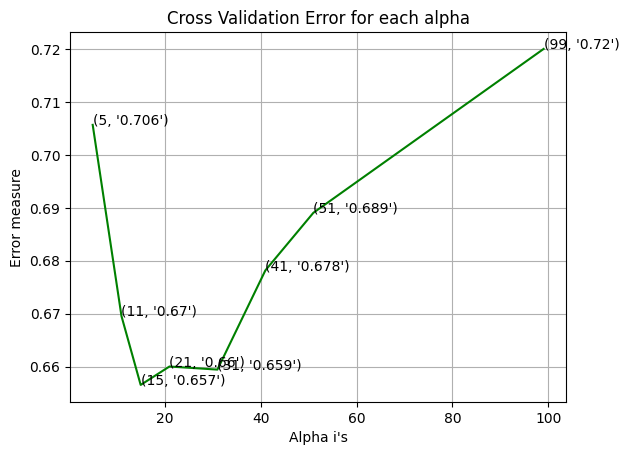

For values of best alpha =  15 The train log loss is: 0.6181795159763447
For values of best alpha =  15 The cross validation log loss is: 0.6565382173459382
For values of best alpha =  15 The test log loss is: 0.6406542226467976


In [ ]:

alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, confusion_matrix

# Your previous code

# Now, you can use the confusion_matrix function without errors.


Log loss : 0.6565382173459382
Number of mis-classified points : 47.732394366197184
-------------------- Confusion matrix --------------------


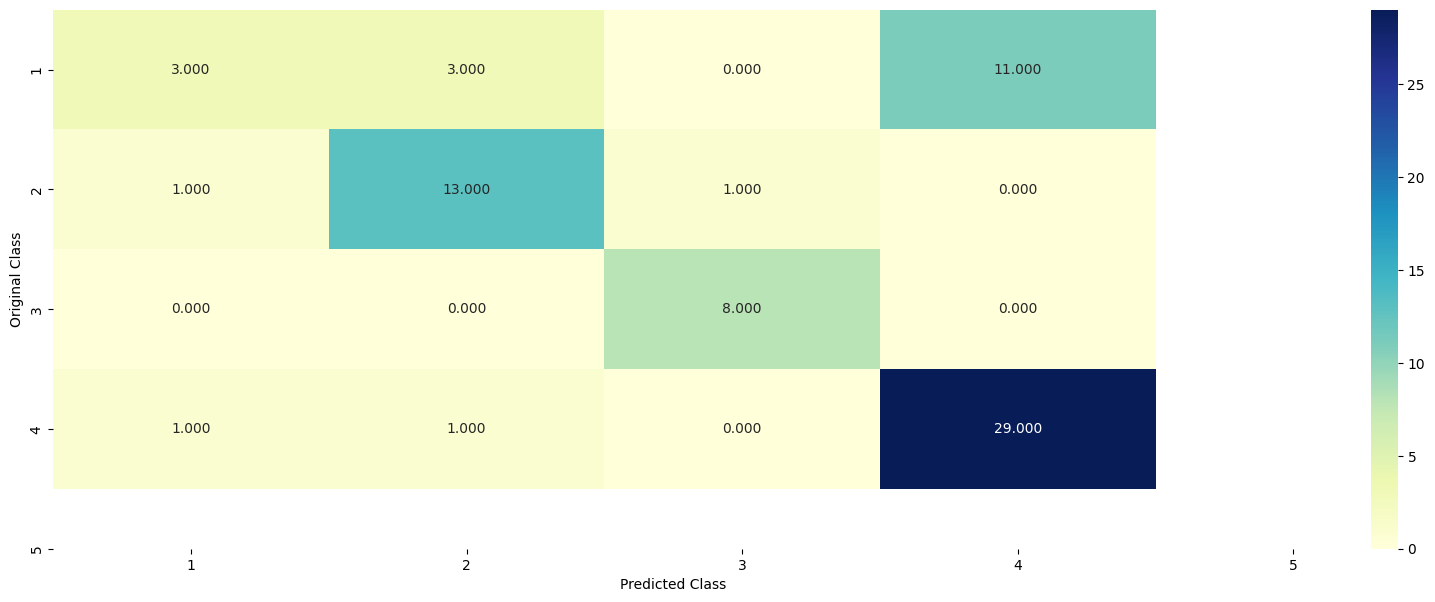

-------------------- Precision matrix (Columm Sum=1) --------------------


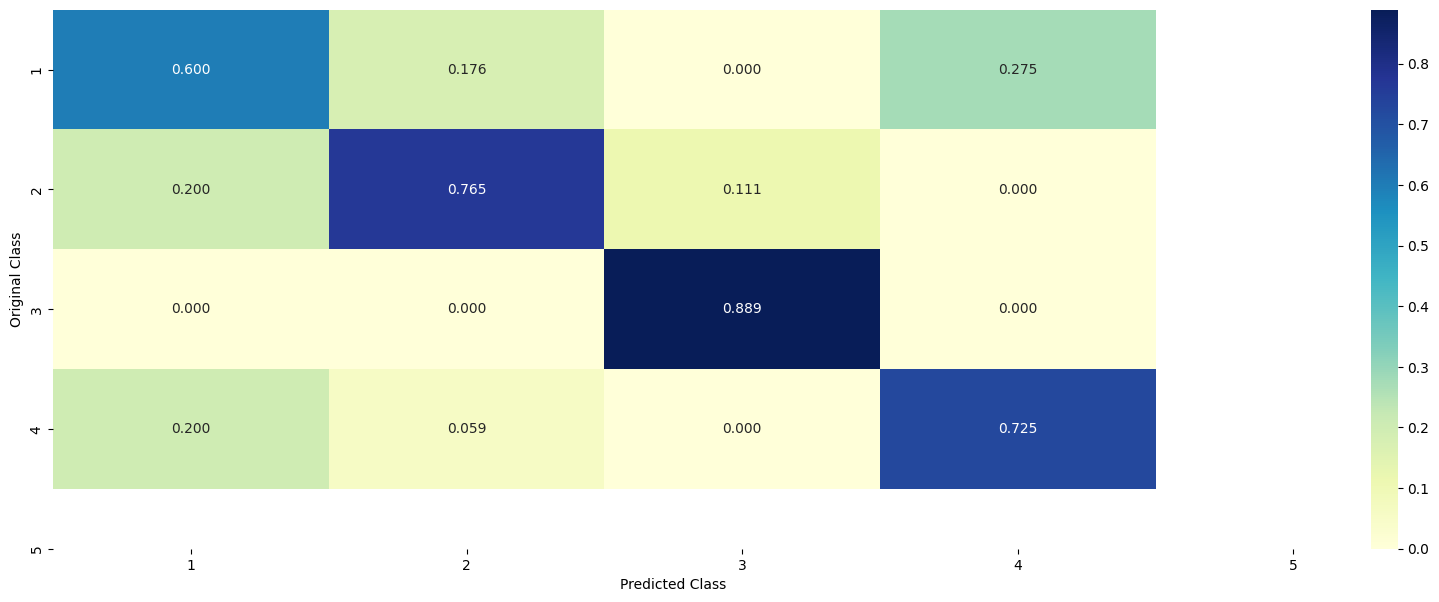

-------------------- Recall matrix (Row sum=1) --------------------


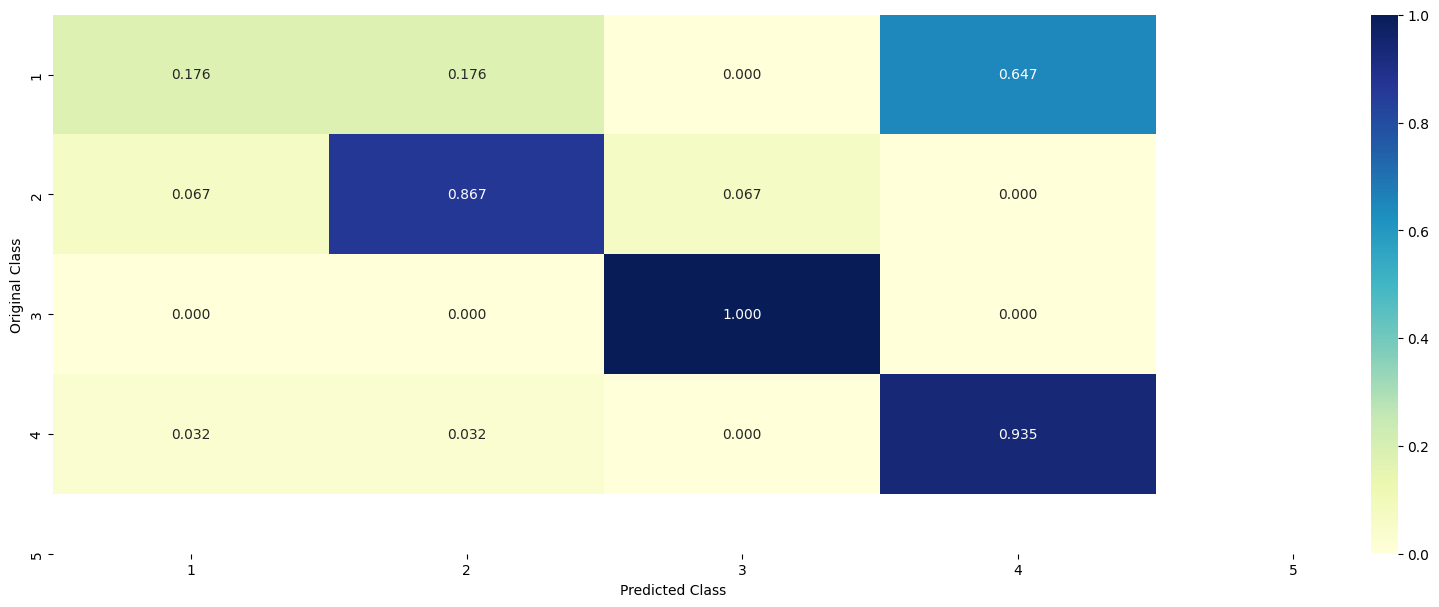

In [ ]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_df.values, y_train.values, cv_df.values, y_cv.values, clf)




##Logistic regression model

In [ ]:
from sklearn.linear_model import SGDClassifier


In [ ]:



alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df,y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df,y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 0.6447347016280329
for n_estimators = 100 and max depth =  10
Log Loss : 0.653456199060878
for n_estimators = 200 and max depth =  5
Log Loss : 0.6430819519245056
for n_estimators = 200 and max depth =  10
Log Loss : 0.6523218276966332
for n_estimators = 500 and max depth =  5
Log Loss : 0.6409325990199409
for n_estimators = 500 and max depth =  10
Log Loss : 0.653029258923949
for n_estimators = 1000 and max depth =  5
Log Loss : 0.640840826741868
for n_estimators = 1000 and max depth =  10
Log Loss : 0.6552072219076263
for n_estimators = 2000 and max depth =  5
Log Loss : 0.6400002355642598
for n_estimators = 2000 and max depth =  10
Log Loss : 0.6546787133456862
For values of best estimator =  2000 The train log loss is: 0.44165963610030545
For values of best estimator =  2000 The cross validation log loss is: 0.6400002355642599
For values of best estimator =  2000 The test log loss is: 0.6495761251431165


Log loss : 0.6400002355642598
Number of mis-classified points : 47.605633802816904
-------------------- Confusion matrix --------------------


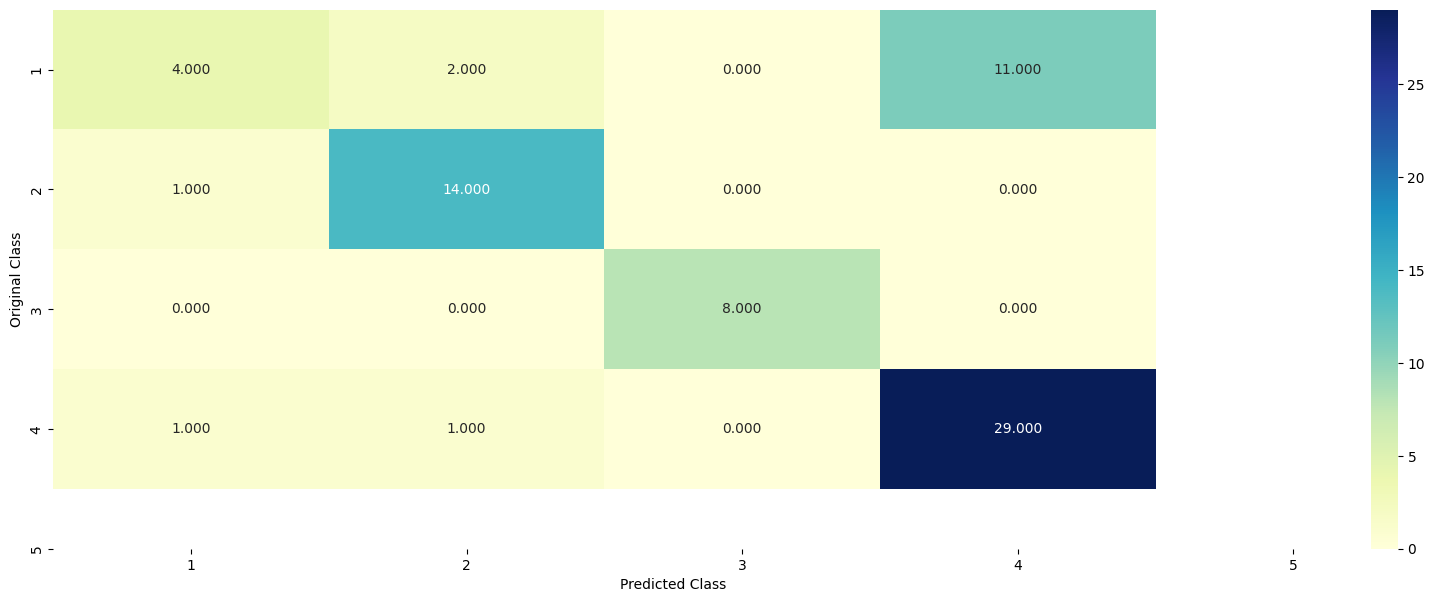

-------------------- Precision matrix (Columm Sum=1) --------------------


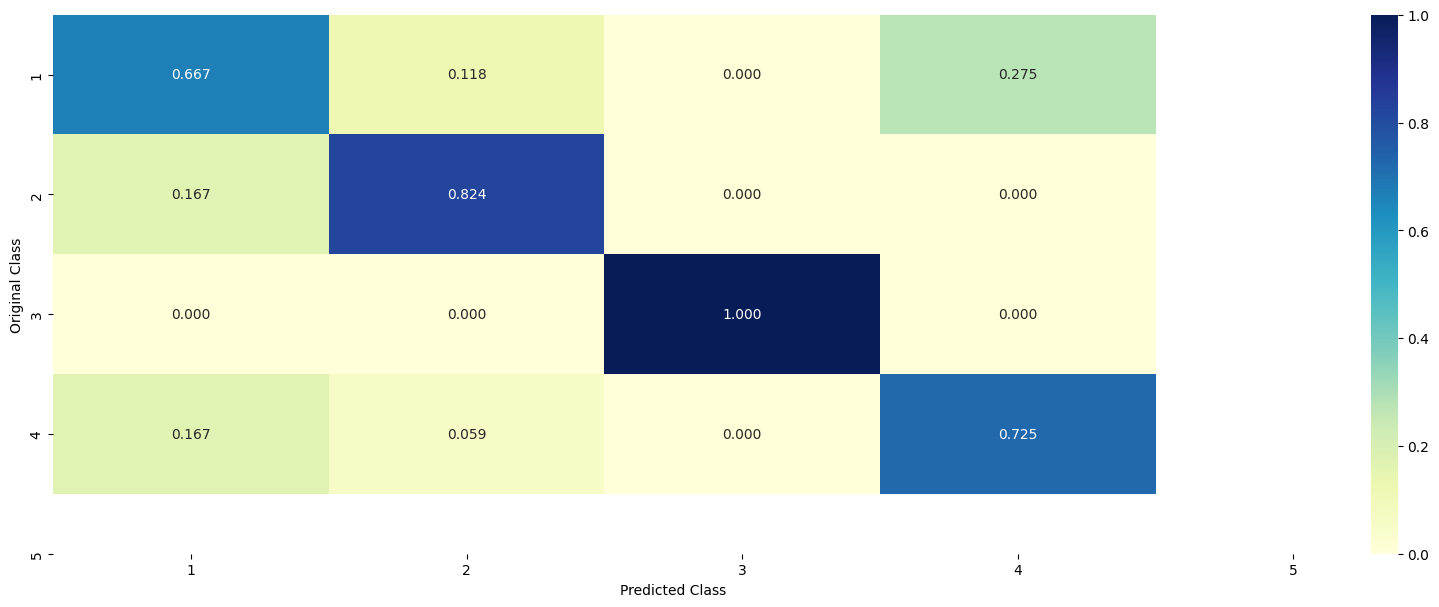

-------------------- Recall matrix (Row sum=1) --------------------


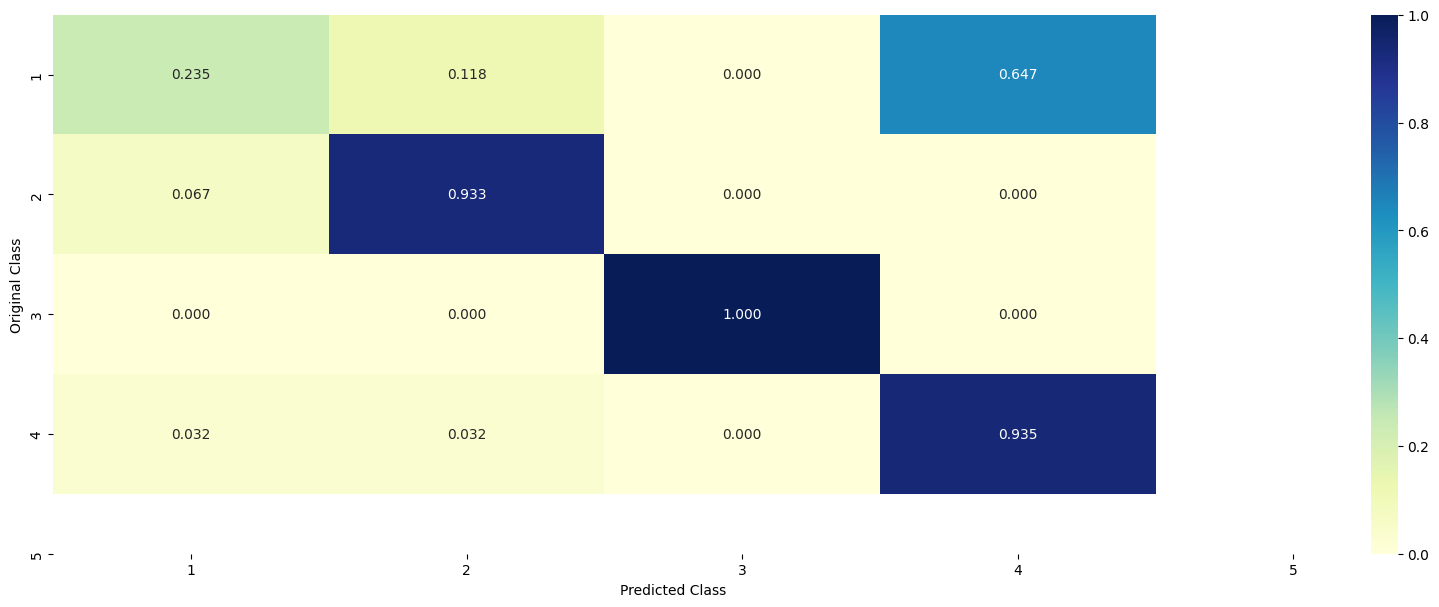

In [ ]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
# predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
predict_and_plot_confusion_matrix(train_df.values, y_train.values, cv_df.values, y_cv.values, clf)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
# Assuming you have predictions for the test set, replace 'pred_y' with your actual prediction array
pred_y = clf.predict(test_df)

accuracy = accuracy_score(y_test, pred_y)
print("Accuracy:", accuracy)


Accuracy: 0.7386363636363636


#Random forest is best among all models


In [ ]:
import pickle
pickle.dump(sig_clf, open('\models\final_prediction.pickle', 'wb'))  #random forest model
pickle.dump(scaler, open('\models\scaler.pickle', 'wb'))